In [1]:
# In colab please uncomment this to install Atari 
# Box2d is a 2D physics engine.
#!pip install box2d-py

     |████████████████████████████████| 448 kB 7.1 MB/s 


In [11]:
# # And for visualization on Colab install
# !pip install pyglet
# !apt-get install -y xvfb python-opengl > /dev/null 2>&1
# !pip install gym pyvirtualdisplay > /dev/null 2>&1


In [3]:
!wget http://www.atarimania.com/roms/Roms.rar
!mkdir /content/ROM/
!unrar e /content/Roms.rar /content/ROM/
!python -m atari_py.import_roms /content/ROM/

--2022-03-26 08:40:32--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11128004 (11M) [application/x-rar-compressed]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  10.61M   491KB/s    in 23s     

2022-03-26 08:40:55 (471 KB/s) - ‘Roms.rar’ saved [11128004/11128004]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/HC ROMS.zip                                      36%  OK 
Extracting  /content/ROM/ROMS.zip                                         74% 99%  OK 
All OK
copying adventure.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Adventure (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from HC ROMS/BY ALPHABET (P

In [4]:
import gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [5]:
env_name = 'Breakout-v0'
env = gym.make(env_name)

In [6]:
frames = [] # array to store state space at each step

env.reset()
done = False
for _ in range(300): 
    #print(done)
    frames.append(env.render(mode='rgb_array'))
    obs,reward,done, _ = env.step(env.action_space.sample())
    if done:
        break

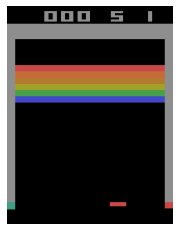

In [8]:
patch = plt.imshow(frames[0])
plt.axis('off')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
def animate(i):
    patch.set_data(frames[i])
anim = animation.FuncAnimation(plt.gcf(), animate, \
                               frames=len(frames), interval=10)
#anim.save('../images/drone_random.gif', writer='pillow')  ##Comment on colab

In [9]:
# For Colab
from IPython.display import HTML
HTML(anim.to_html5_video())

In [10]:
import gym
env = gym.make("Breakout-v0")
env = gym.wrappers.Monitor(env, 'recording', force=True)
observation = env.reset()
for _ in range(1000):
    #env.render()
    action = env.action_space.sample() # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)

    if done:
        observation = env.reset()
env.close()